In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 200

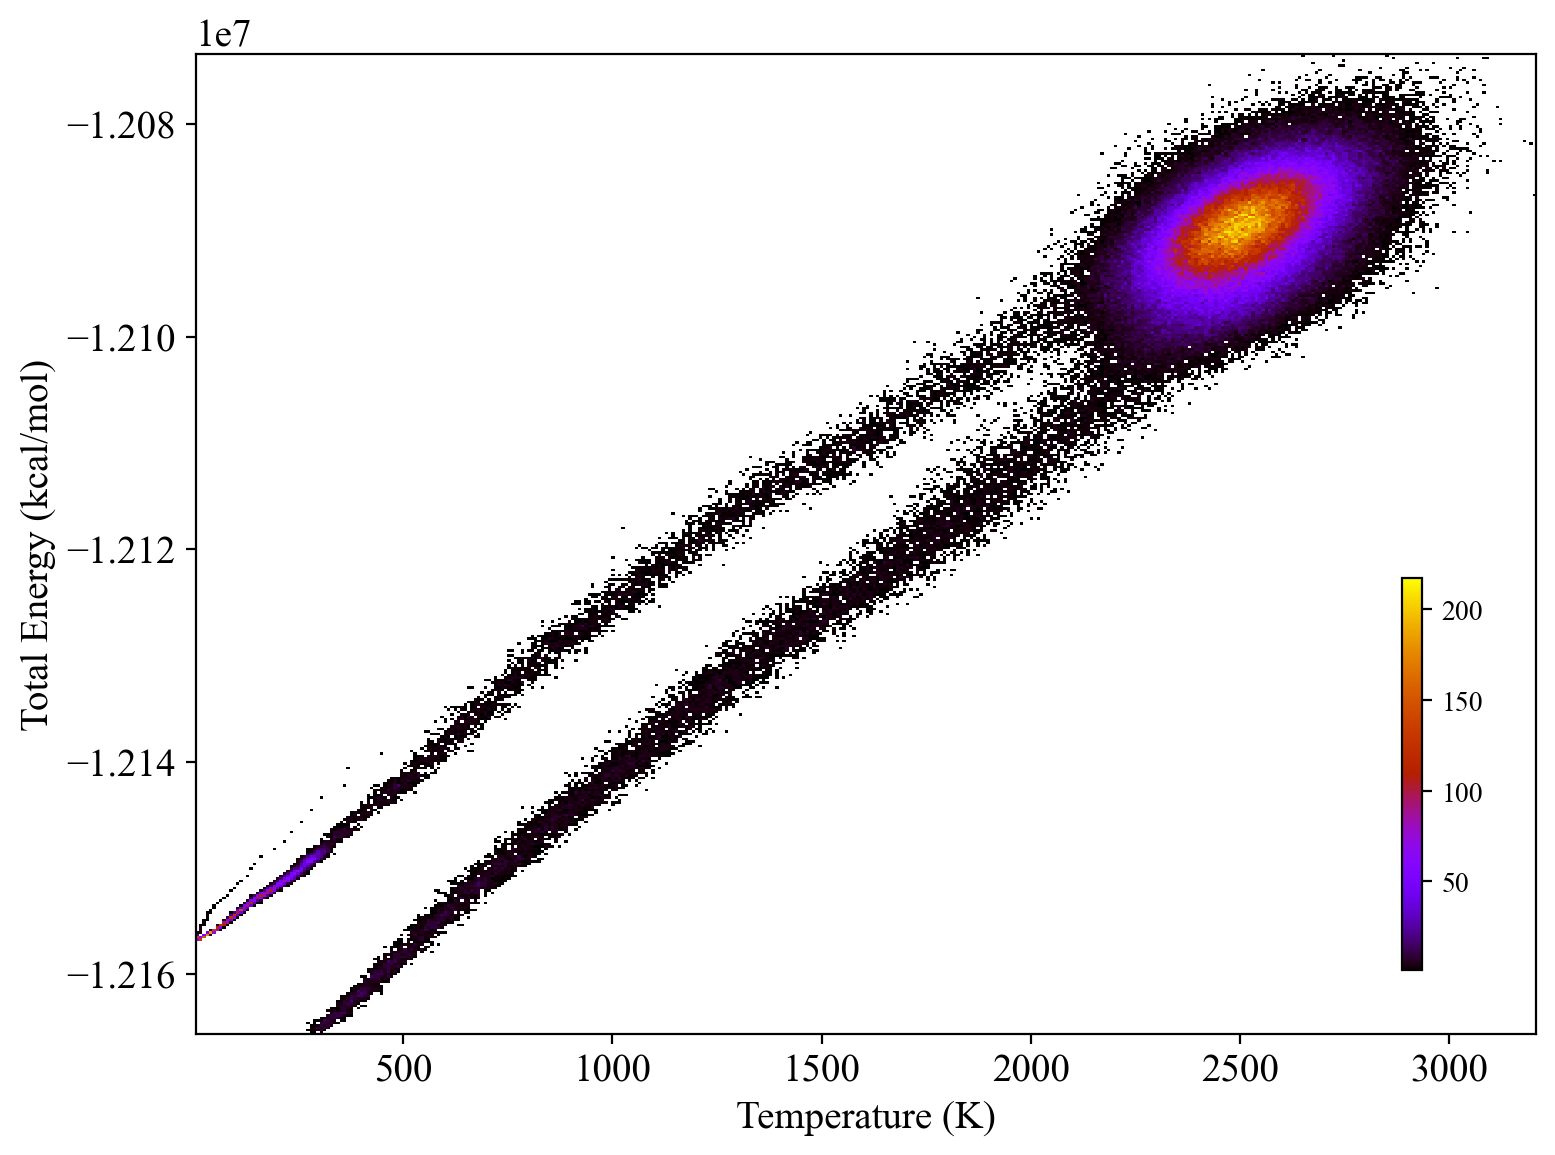

In [3]:
log_file = '2025-02-13-111053.718800-kokkos-models_-1-gpus_1-mixture_228-scale_early_earth_ani1x_nr.log'
data = []
with open(log_file, "r") as file:
    for line in file:
        if re.match(r"\s*\d+\s+-?\d+\.\d+E?[+-]?\d*\s+-?\d+\.\d+E?[+-]?\d*", line):
            data.append(line.split())

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Step", "PotEng", "KinEng", "TotEng", "Temp", "Press", "Volume", "Density"], dtype=float)
df["TotEng_kcalmol"] = df["TotEng"] * 23.0605
df = df.astype(float)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

hist = ax.hist2d(df['Temp'], df['TotEng_kcalmol'], bins=400, cmap='gnuplot', cmin=0.1)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Total Energy (kcal/mol)")
cax = ax.inset_axes([0.9, 0.065, 0.015, 0.4])  # [x, y, width, height] as fractions of the axis
cbar = plt.colorbar(hist[3], cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=10)  # Adjust tick label size

plt.tight_layout()
plt.savefig('./early_earth/228_tot_eng.png')

plt.show()

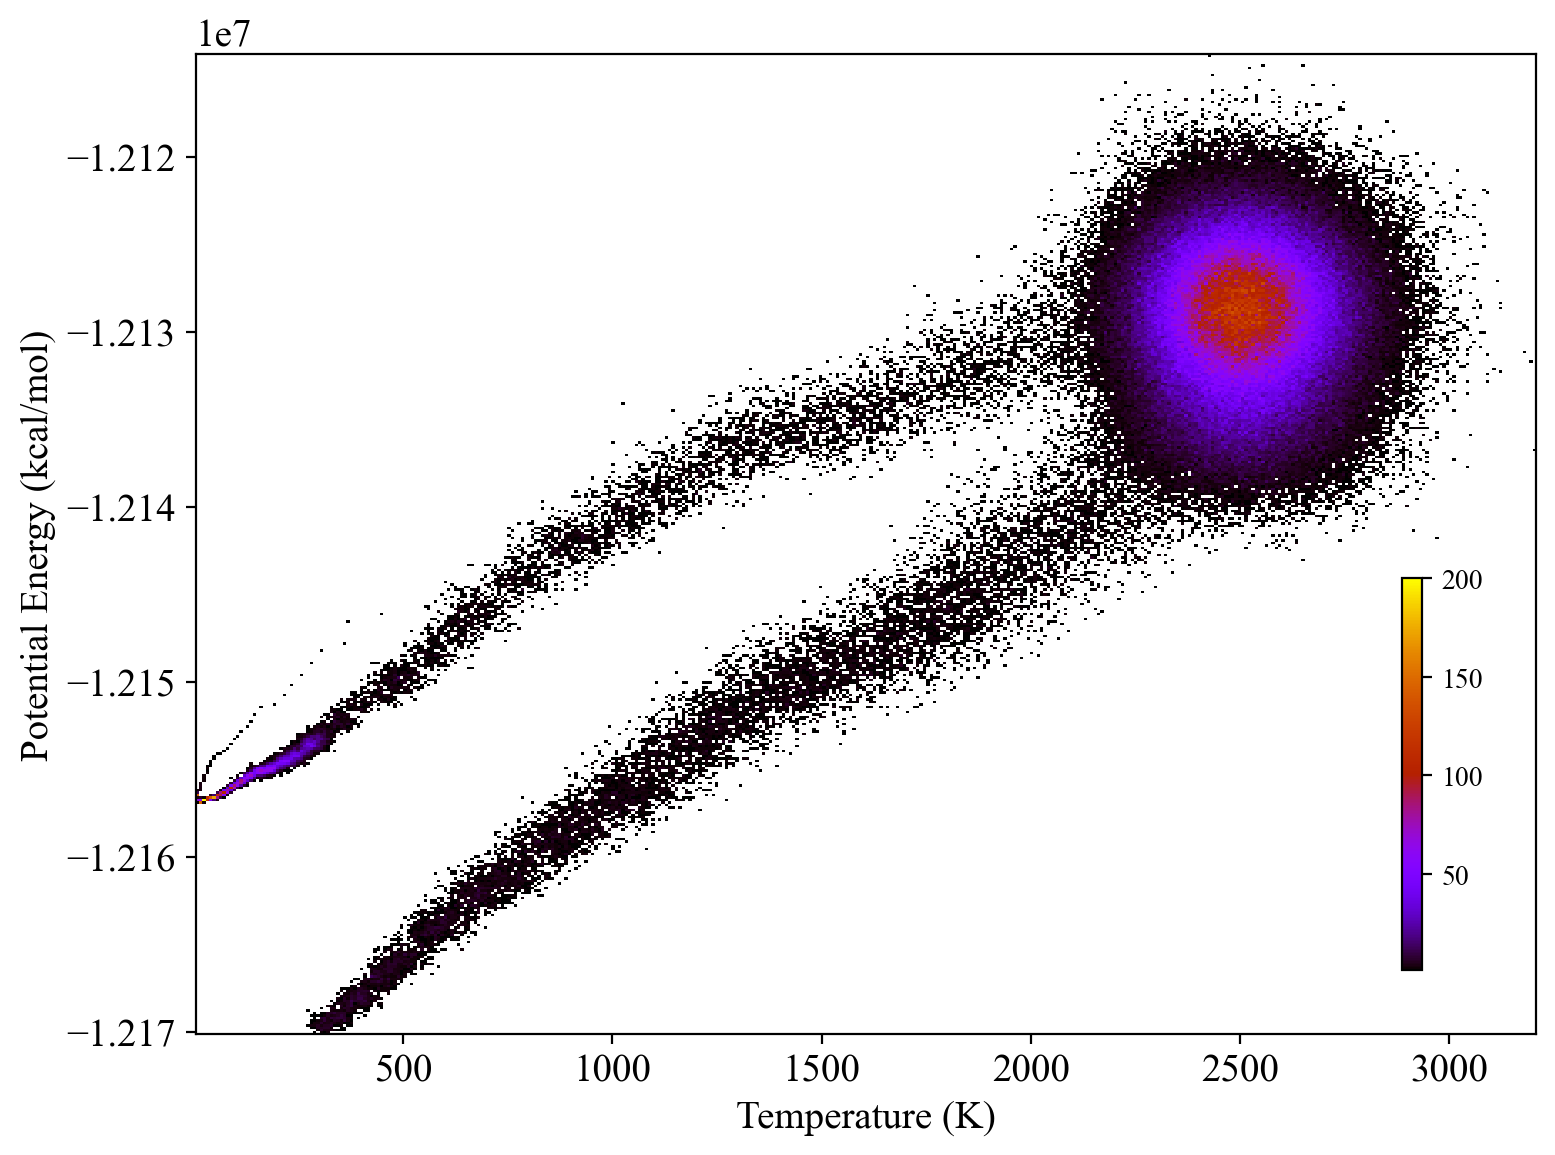

In [4]:
log_file = '2025-02-13-111053.718800-kokkos-models_-1-gpus_1-mixture_228-scale_early_earth_ani1x_nr.log'
data = []
with open(log_file, "r") as file:
    for line in file:
        if re.match(r"\s*\d+\s+-?\d+\.\d+E?[+-]?\d*\s+-?\d+\.\d+E?[+-]?\d*", line):
            data.append(line.split())

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Step", "PotEng", "KinEng", "TotEng", "Temp", "Press", "Volume", "Density"], dtype=float)
df["PotEng_kcalmol"] = df["PotEng"] * 23.0605

df = df.astype(float)

fig, ax = plt.subplots(figsize=(8,6))
hist = ax.hist2d(df['Temp'], df['PotEng_kcalmol'], bins=400, cmap='gnuplot', cmin=0.1)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Potential Energy (kcal/mol)")
cax = ax.inset_axes([0.9, 0.065, 0.015, 0.4])  # [x, y, width, height] as fractions of the axis
cbar = plt.colorbar(hist[3], cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=10)  # Adjust tick label size
plt.tight_layout()
plt.savefig('./early_earth/228_pot_eng.png')
plt.show()

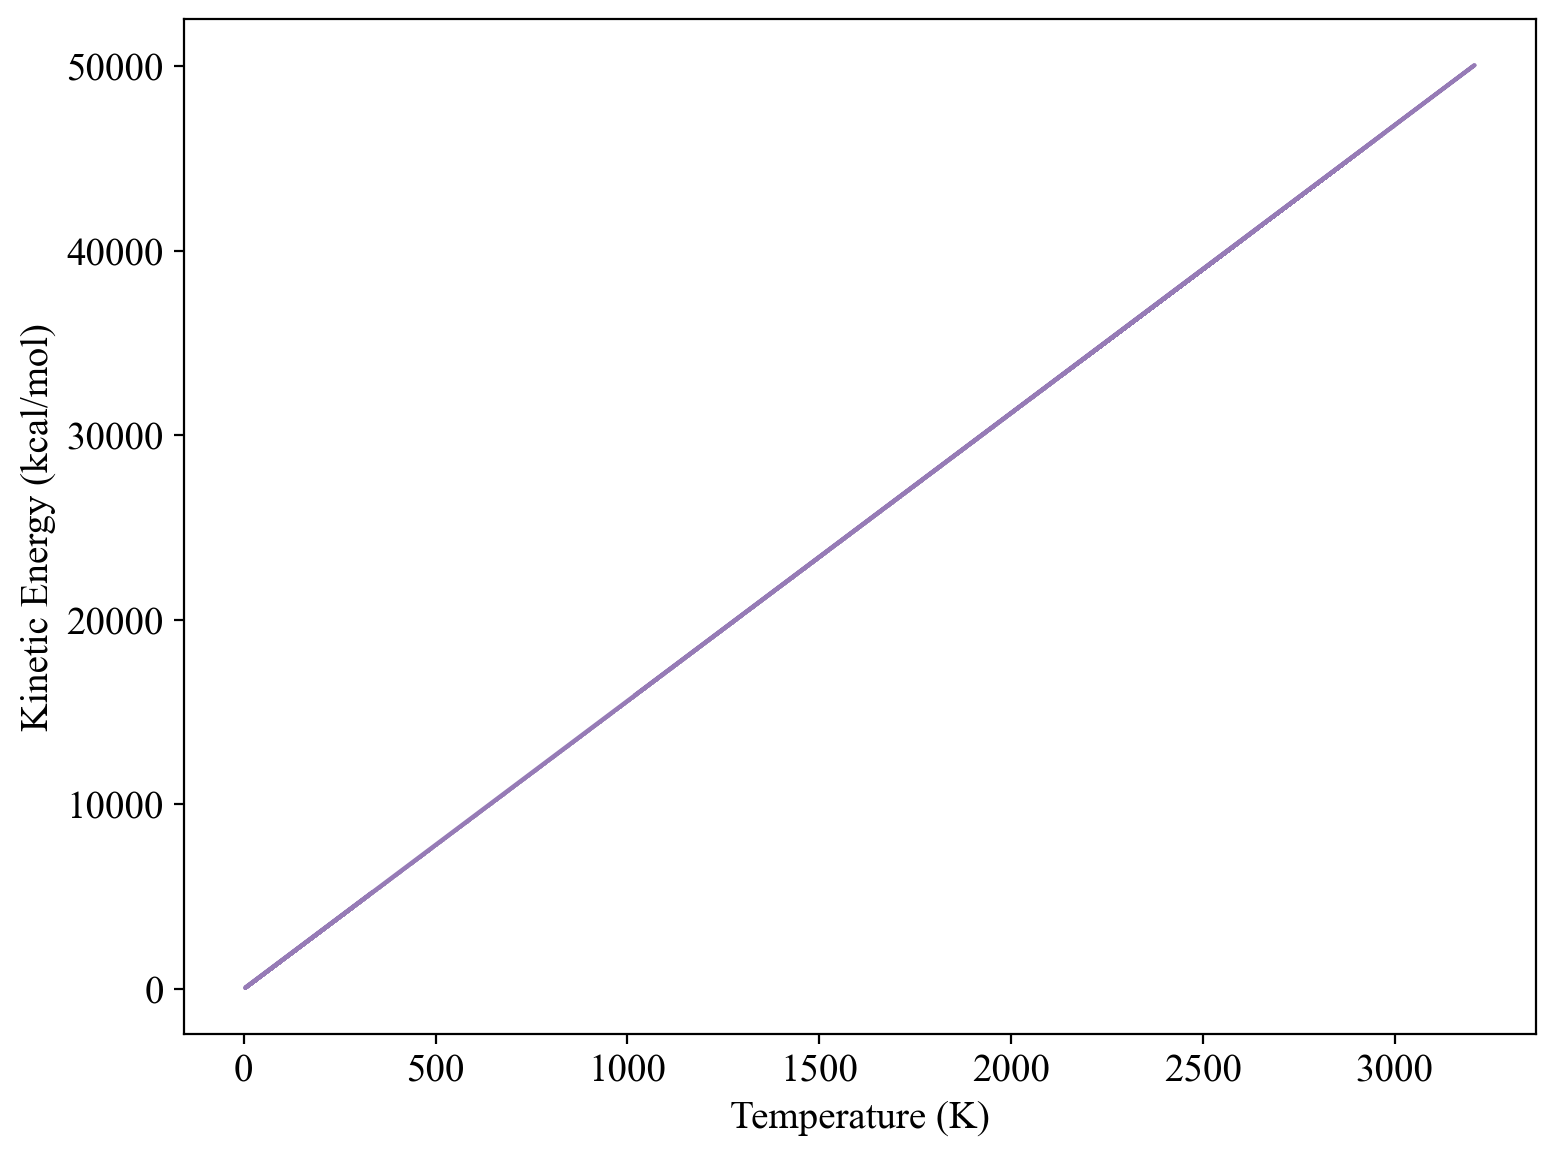

In [5]:
log_file = '2025-02-13-111053.718800-kokkos-models_-1-gpus_1-mixture_228-scale_early_earth_ani1x_nr.log'
data = []
with open(log_file, "r") as file:
    for line in file:
        if re.match(r"\s*\d+\s+-?\d+\.\d+E?[+-]?\d*\s+-?\d+\.\d+E?[+-]?\d*", line):
            data.append(line.split())

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Step", "PotEng", "KinEng", "TotEng", "Temp", "Press", "Volume", "Density"], dtype=float)
df["KinEng_kcalmol"] = df["KinEng"] * 23.0605

# Plot Energy vs Temperature
plt.plot(df['Temp'], df['KinEng_kcalmol'], marker='*', markersize=0.1, color="#967BB6")
plt.xlabel("Temperature (K)")
plt.ylabel("Kinetic Energy (kcal/mol)")
plt.tight_layout()
plt.savefig('./early_earth/228_kin_e.png')
plt.show()

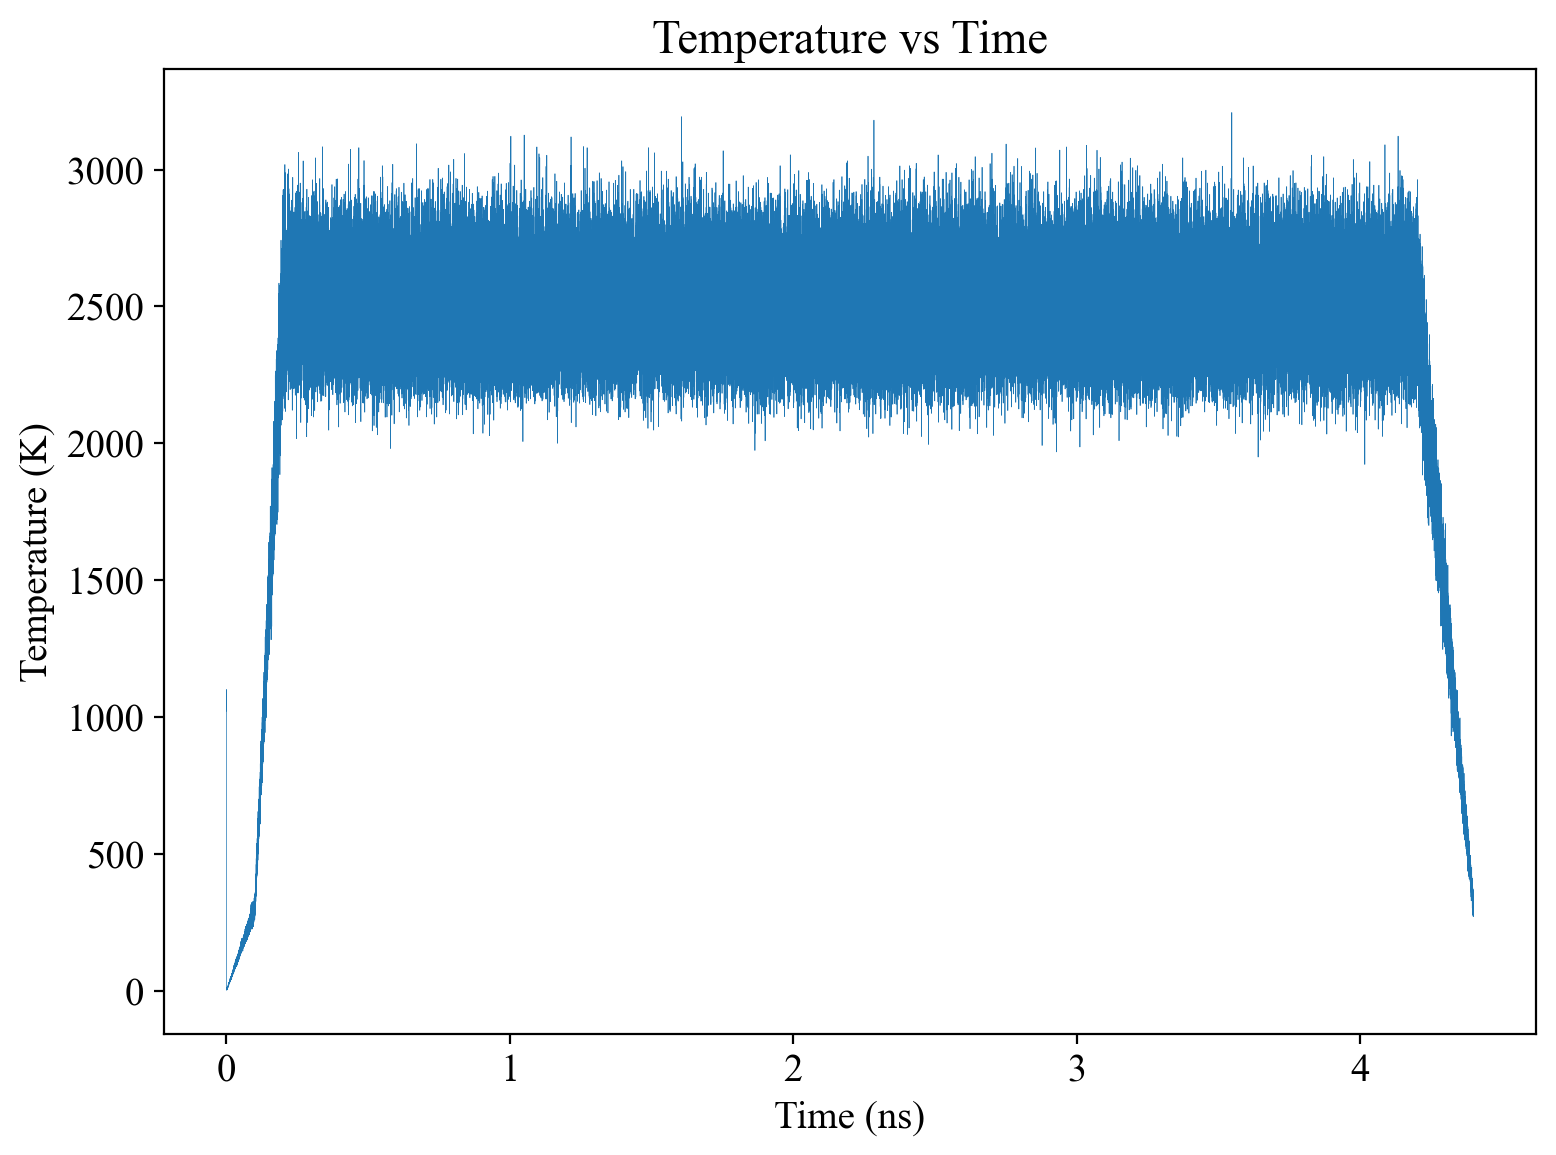

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

log_file = '2025-02-13-111053.718800-kokkos-models_-1-gpus_1-mixture_228-scale_early_earth_ani1x_nr.log'
data = []
with open(log_file, "r") as file:
    for line in file:
        if re.match(r"\s*\d+\s+-?\d+\.\d+E?[+-]?\d*\s+-?\d+\.\d+E?[+-]?\d*", line):
            data.append(line.split())

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Step", "PotEng", "KinEng", "TotEng", "Temp", "Press", "Volume", "Density"], dtype=float)

# Add time in nanoseconds
fs_per_step = 0.25  # femtoseconds
df["Time_fs"] = df["Step"] * fs_per_step
df["Time_ns"] = df["Time_fs"] / 1e6  # convert to nanoseconds

# Plot Temperature vs Time
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df["Time_ns"], df["Temp"], lw=0.25)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Temperature vs Time")
plt.tight_layout()
plt.show()

In [15]:
df.iloc[0:50]

,Step,PotEng,KinEng,TotEng,Temp,Press,Volume,Density,Time_fs,Time_ns
0,50.0,-526184.62,691.952930,-525492.67,1022.625000,17433.47800,1814.368,1.043007,12.5,0.000013
1,100.0,-526425.88,744.886260,-525680.99,1100.854200,18767.11200,1814.368,1.043007,25.0,0.000025
2,150.0,-526459.50,612.016800,-525847.48,904.488780,15419.51900,1814.368,1.043007,37.5,0.000037
3,200.0,-526492.44,510.056430,-525982.38,753.803360,12850.66800,1814.368,1.043007,50.0,0.000050
4,250.0,-526612.19,506.572760,-526105.61,748.654910,12762.89800,1814.368,1.043007,62.5,0.000063
5,300.0,-526626.19,407.091910,-526219.10,601.633930,10256.51800,1814.368,1.043007,75.0,0.000075
6,350.0,-526690.25,372.493850,-526317.76,550.502060,9384.83370,1814.368,1.043007,87.5,0.000087
7,400.0,-526704.94,301.590850,-526403.35,445.715770,7598.46080,1814.368,1.043007,100.0,0.000100
8,450.0,-526722.19,250.355200,-526471.83,369.995510,6307.59920,1814.368,1.043007,112.5,0.000112
9,500.0,-526777.06,243.074660,-526533.99,359.235730,6124.16890,1814.368,1.043007,125.0,0.000125


Header found! Reading starts now.
Stopping at non-numeric line: Other   |            | 2.159      |            |       |  0.08


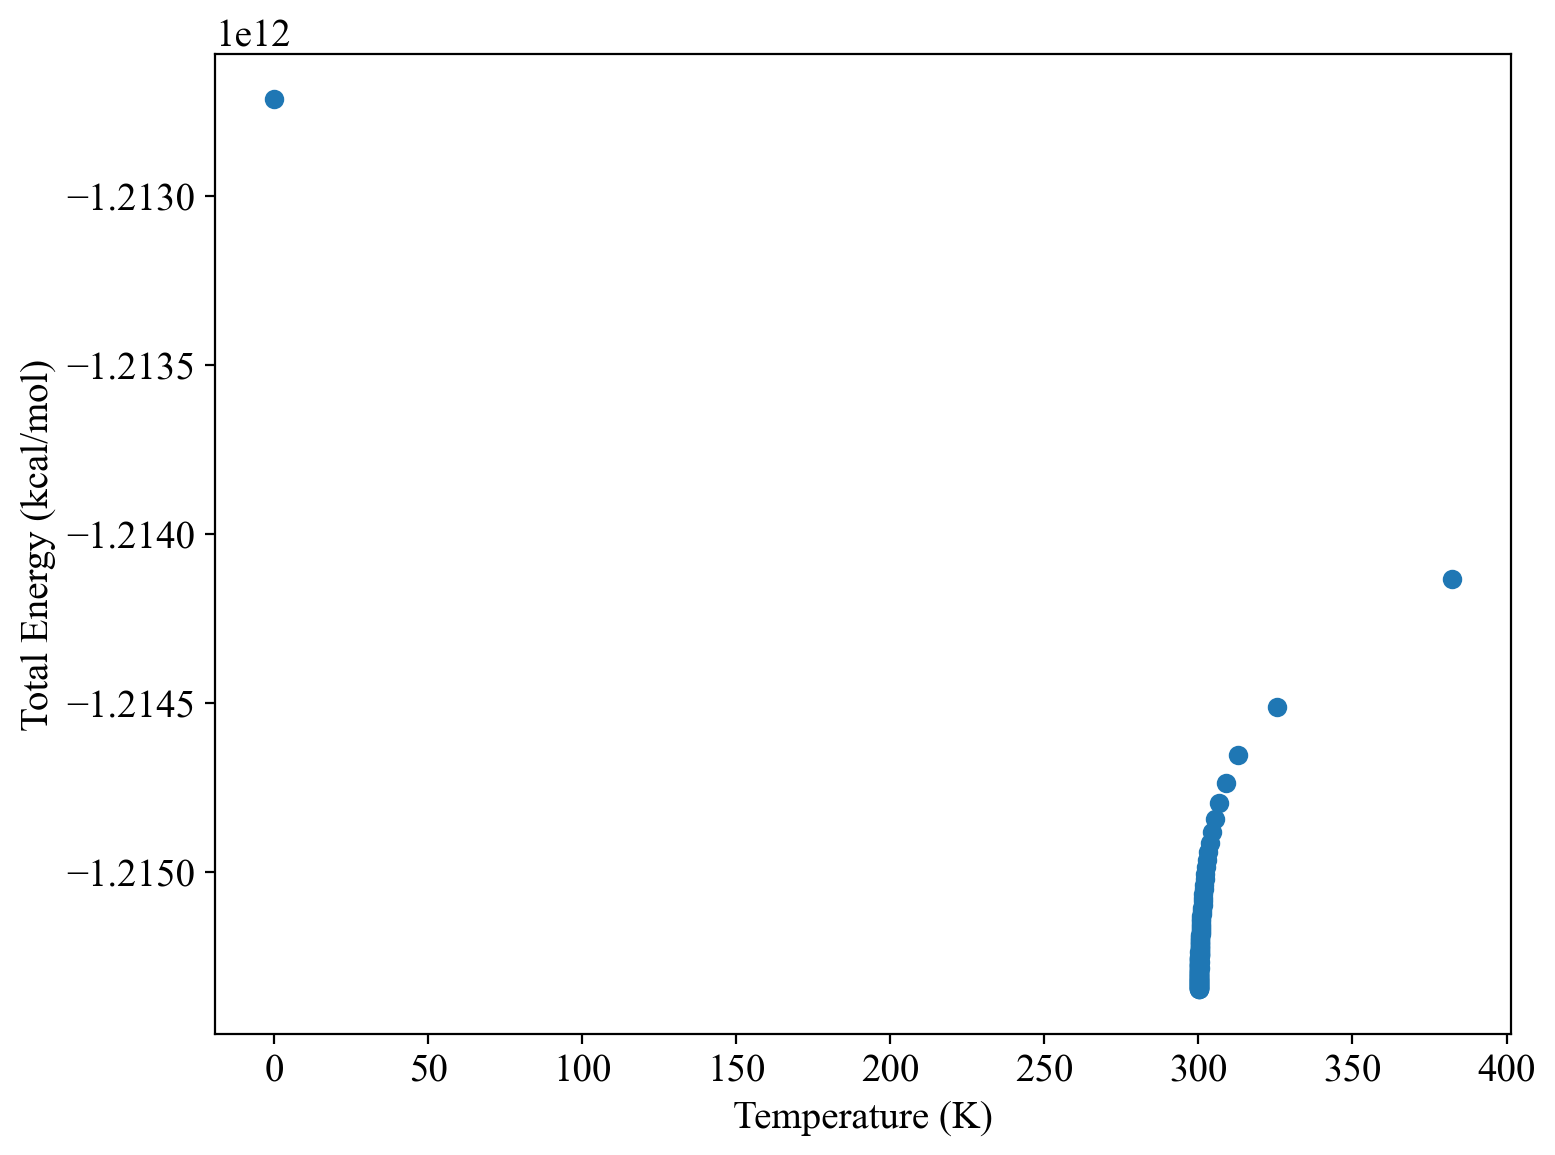

In [106]:

log_file = '2024-09-03-144244.920253-kokkos-models_8-gpus_32-frame_196366-early_earth_22M_196366_quench.log'

data = []
start_reading = False

with open(log_file, "r") as file:
    for line in file:
        # Detect header line and start reading afterward
        if "Step" in line and "PotEng" in line:
            start_reading = True
            print("Header found! Reading starts now.")
            continue  # Skip header line itself
        
        if start_reading:
            # Remove extra spaces and split into parts
            values = line.strip().split()

            # Ensure it contains exactly 8 values (numeric data)
            if len(values) == 8:
                try:
                    # Convert to floats
                    float_values = list(map(float, values))
                    data.append(float_values)
                except ValueError:
                    print(f"Stopping at non-numeric line: {line.strip()}")  # Debugging
                    break  # Stop reading when a non-numeric line appears


# Convert extracted data to DataFrame
columns = ["Step", "PotEng", "KinEng", "TotEng", "Temp", "Press", "Volume", "Density"]
df = pd.DataFrame(data, columns=columns)
df = df.astype(float)  # Convert all columns to float for numerical operations

# Convert Total Energy from eV to kcal/mol
df["TotEng_kcalmol"] = df["TotEng"] * 23.0605

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Create 2D histogram
ax.scatter(df['Temp'], df['TotEng_kcalmol'])

# Labels
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Total Energy (kcal/mol)")
#ax.grid(True)
plt.savefig('./early_earth/22.8M_quench.png')
plt.tight_layout()
plt.show()

In [99]:
df

,Step,PotEng,KinEng,TotEng,Temp,Press,Volume,Density,TotEng_kcalmol


,Step,PotEng,KinEng,TotEng,Temp,Press,Volume,Density
